In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

import hdbscan
from sklearn.datasets import make_blobs

import pandas as pd

import seaborn as sns
sns.set(style="darkgrid")

In [42]:
# Our ephys variables of interest
columns = ["RinputPolyFit1_slope_25pA",
  "SagPolyFit1_slope",
  "sagTauLargestCurrentStep",
  "postStepAHP_MaxSweep",
  "RMP",
  "maxSlopeFIcurve_CC25_1",
  "max_nSpikes_StepTotal"]

In [74]:
df = pd.read_csv('data/PLData.csv')[columns].dropna()

In [75]:
df

RinputPolyFit1_slope_25pA  SagPolyFit1_slope  sagTauLargestCurrentStep  \
0                   111.440962           0.275779                    463.80   
1                   197.431701           0.041370                     51.80   
2                   167.769898           0.054556                    424.60   
3                   182.924390           0.036202                    397.00   
4                    83.547156           0.458141                    317.30   
..                         ...                ...                       ...   
100                 234.663579           0.220483                    169.40   
101                 136.481769           0.280080                    319.65   
102                 157.596293           0.237112                    435.65   
103                 117.604300           0.240803                    542.20   
104                  97.968013           0.444312                    369.85   

     postStepAHP_MaxSweep  RMP  maxSlopeFIcurve_CC25_1  max_nSpikes_StepTotal  
0              -85.418703  -65                    0.20                   34.0  
1              -73.706056  -44                    0.44                   54.0  
2              -75.927736  -53                    0.28                   46.0  
3              -77.819826  -40                    0.36                   40.0  
4              -81.390383  -60                    0.24                   31.0  
..                    ...  ...                     ...                    ...  
100            -66.442873  -61                    0.64                   80.0  
101            -79.394533  -67                    0.40                   76.0  
102            -78.918459  -64                    0.48                   74.0  
103            -84.198000  -65                    0.40                   65.0  
104            -83.227541  -59                    0.24                   44.0  

[98 rows x 7 columns]

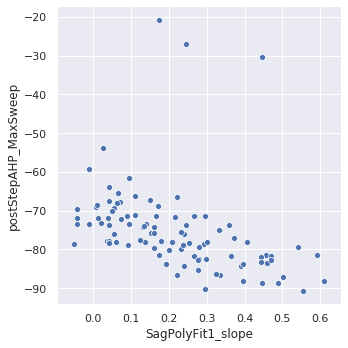

In [56]:
sns.relplot(x="SagPolyFit1_slope", y="postStepAHP_MaxSweep", data=df);

In [57]:
df.loc[df['postStepAHP_MaxSweep'] > -40]

RinputPolyFit1_slope_25pA  SagPolyFit1_slope  sagTauLargestCurrentStep  \
34                 167.857565           0.173719                    465.80   
47                 119.571361           0.244809                    413.50   
91                 125.588647           0.445540                    349.85   

    postStepAHP_MaxSweep  RMP  maxSlopeFIcurve_CC25_1  max_nSpikes_StepTotal  
34            -20.904541  -62                    0.36                   50.0  
47            -26.947022  -60                    0.32                   52.0  
91            -30.456544  -56                    0.52                   79.0

In [58]:
data = df[columns].to_numpy()

In [59]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(data)

In [60]:
df['label'] = cluster_labels

In [62]:
df

RinputPolyFit1_slope_25pA  SagPolyFit1_slope  sagTauLargestCurrentStep  \
0                   111.440962           0.275779                    463.80   
1                   197.431701           0.041370                     51.80   
2                   167.769898           0.054556                    424.60   
3                   182.924390           0.036202                    397.00   
4                    83.547156           0.458141                    317.30   
..                         ...                ...                       ...   
100                 234.663579           0.220483                    169.40   
101                 136.481769           0.280080                    319.65   
102                 157.596293           0.237112                    435.65   
103                 117.604300           0.240803                    542.20   
104                  97.968013           0.444312                    369.85   

     postStepAHP_MaxSweep  RMP  maxSlopeFIcurve_CC25_1  max_nSpikes_StepTotal  \
0              -85.418703  -65                    0.20                   34.0   
1              -73.706056  -44                    0.44                   54.0   
2              -75.927736  -53                    0.28                   46.0   
3              -77.819826  -40                    0.36                   40.0   
4              -81.390383  -60                    0.24                   31.0   
..                    ...  ...                     ...                    ...   
100            -66.442873  -61                    0.64                   80.0   
101            -79.394533  -67                    0.40                   76.0   
102            -78.918459  -64                    0.48                   74.0   
103            -84.198000  -65                    0.40                   65.0   
104            -83.227541  -59                    0.24                   44.0   

     label  
0       -1  
1       -1  
2       -1  
3       -1  
4       -1  
..     ...  
100     -1  
101     -1  
102     -1  
103     -1  
104     -1  

[98 rows x 8 columns]

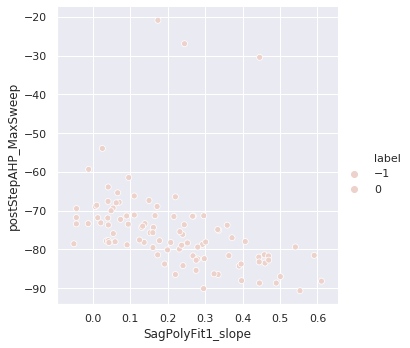

In [61]:
sns.relplot(x="SagPolyFit1_slope", y="postStepAHP_MaxSweep", hue='label', data=df);

In [91]:
df2 = df.copy().loc[df['postStepAHP_MaxSweep'] < -40]

In [92]:
df2

RinputPolyFit1_slope_25pA  SagPolyFit1_slope  sagTauLargestCurrentStep  \
0                   111.440962           0.275779                    463.80   
1                   197.431701           0.041370                     51.80   
2                   167.769898           0.054556                    424.60   
3                   182.924390           0.036202                    397.00   
4                    83.547156           0.458141                    317.30   
..                         ...                ...                       ...   
100                 234.663579           0.220483                    169.40   
101                 136.481769           0.280080                    319.65   
102                 157.596293           0.237112                    435.65   
103                 117.604300           0.240803                    542.20   
104                  97.968013           0.444312                    369.85   

     postStepAHP_MaxSweep  RMP  maxSlopeFIcurve_CC25_1  max_nSpikes_StepTotal  
0              -85.418703  -65                    0.20                   34.0  
1              -73.706056  -44                    0.44                   54.0  
2              -75.927736  -53                    0.28                   46.0  
3              -77.819826  -40                    0.36                   40.0  
4              -81.390383  -60                    0.24                   31.0  
..                    ...  ...                     ...                    ...  
100            -66.442873  -61                    0.64                   80.0  
101            -79.394533  -67                    0.40                   76.0  
102            -78.918459  -64                    0.48                   74.0  
103            -84.198000  -65                    0.40                   65.0  
104            -83.227541  -59                    0.24                   44.0  

[95 rows x 7 columns]

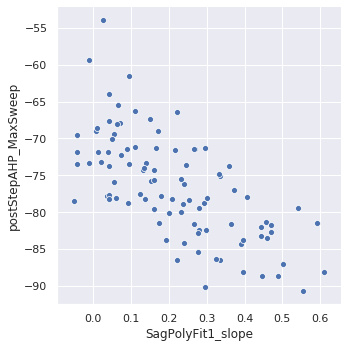

In [93]:
sns.relplot(x="SagPolyFit1_slope", y="postStepAHP_MaxSweep", data=df2);

In [94]:
data2 = df2[columns].to_numpy()
clusterer2 = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels2 = clusterer.fit_predict(data2)

In [95]:
df2['label'] = cluster_labels2

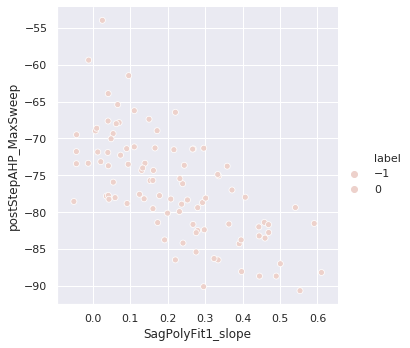

In [96]:
sns.relplot(x="SagPolyFit1_slope", y="postStepAHP_MaxSweep", hue='label', data=df2);

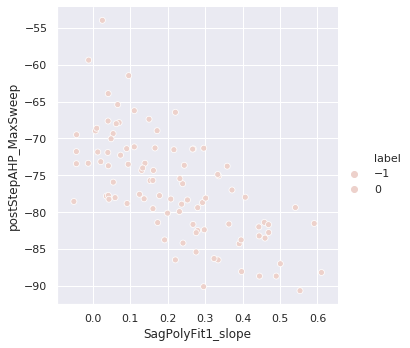

In [110]:
data2 = df2[columns].to_numpy()
clusterer2 = hdbscan.HDBSCAN(min_cluster_size=3, cluster_selection_epsilon=3, allow_single_cluster=True)
cluster_labels2 = clusterer.fit_predict(data2)
df2['label'] = cluster_labels2
sns.relplot(x="SagPolyFit1_slope", y="postStepAHP_MaxSweep", hue='label', data=df2);